In [ ]:
import gym
import numpy as np
import gym_donkeycar

# env = gym.make("donkey-warren-track-v0")
env = gym.make("donkey-generated-track-v0")

obs = env.reset()
try:
    for _ in range(100):
        # drive straight with small speed
        action = np.array([0.0, 0.5])  
        # execute the action
        obs, reward, done, info = env.step(action)
        print(info["cte"])
except KeyboardInterrupt:
    # You can kill the program using ctrl+c
    pass

    # Exit the scene
env.close()

In [1]:
import gym
import numpy as np
import gym_donkeycar
import time 

In [2]:
env = gym.make("donkey-generated-track-v0")

INFO:gym_donkeycar.core.client:connecting to localhost:9091 


starting DonkeyGym env
Setting default: start_delay 5.0
Setting default: max_cte 5.0
Setting default: frame_skip 2
Setting default: cam_resolution (120, 160, 3)
Setting default: log_level 20
Setting default: host localhost
Setting default: port 9091
loading scene generated_track


INFO:gym_donkeycar.envs.donkey_sim:on need car config
INFO:gym_donkeycar.envs.donkey_sim:sending car config.
INFO:gym_donkeycar.envs.donkey_sim:done sending car config.


In [3]:
obs = env.reset()

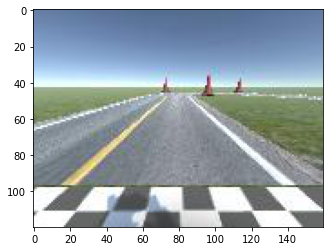

In [4]:
import matplotlib.pyplot as plt
plt.imshow(obs)

In [5]:
obs.shape

(120, 160, 3)

-33.10763
2.505777
-34.64117
3.611551


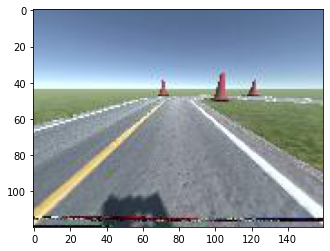

INFO:gym_donkeycar.envs.donkey_sim:on need car config
INFO:gym_donkeycar.envs.donkey_sim:sending car config.
INFO:gym_donkeycar.envs.donkey_sim:done sending car config.


In [14]:
action = np.array([0, 1])  
# execute the action
env.render()
obs, reward, done, info = env.step(action)
print(info["cte"])
print(info["speed"])

time.sleep(0.5)
action = np.array([0.0, 0.0])  
# execute the action
env.render()
obs, reward, done, info = env.step(action)
print(info["cte"])
print(info["speed"])
plt.imshow(obs)

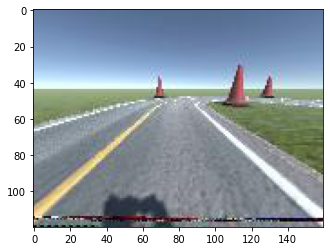

In [54]:
print(env.viewer.handler.cte)

0.02698135


In [52]:
action = np.array([0.0, 0.0])  
# execute the action
obs, reward, done, info = env.step(action)
print(info["cte"])
print(info["speed"])
print(done)

-13.25014
3.297553e-07
True


In [74]:
steer = 0
throttle = 1
brake = 0.0
message = {"msg_type": "control", "steering": steer.__str__(), "throttle": throttle.__str__(), "brake": "0.0"}

In [81]:
env.viewer.client.send_now(message)

In [15]:
env.close()

### Lane segmentation

In [3]:
import gym
import numpy as np
import gym_donkeycar
import time 
import matplotlib.pyplot as plt

In [4]:
env = gym.make("donkey-generated-track-v0")

INFO:gym_donkeycar.core.client:connecting to localhost:9091 


starting DonkeyGym env
Setting default: start_delay 5.0
Setting default: max_cte 5.0
Setting default: frame_skip 2
Setting default: cam_resolution (120, 160, 3)
Setting default: log_level 20
Setting default: host localhost
Setting default: port 9091
loading scene generated_track


INFO:gym_donkeycar.envs.donkey_sim:on need car config
INFO:gym_donkeycar.envs.donkey_sim:sending car config.
INFO:gym_donkeycar.envs.donkey_sim:done sending car config.


In [5]:
obs = env.reset()

In [6]:
print(obs.shape)

(120, 160, 3)


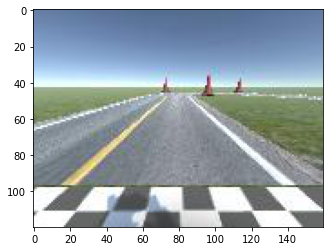

In [7]:
plt.imshow(obs)

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

Edges_Detection = True

ROI_y = 40

def detect_edges(image, low_threshold, high_threshold):
    return cv2.Canny(image, low_threshold, high_threshold)

def preprocess_image(image):
    grey_only = not Edges_Detection
    global x
    
    if grey_only:
        grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        grey = np.stack((grey, )*3, axis=-1)
        # print("Processed Image Shape: {}".format(grey.shape))
        return grey
    img = cv2.GaussianBlur(image, (5, 5), 0)
    edges = detect_edges(img, low_threshold=80, high_threshold=20)
    
    #cropped edges
    edges[0:ROI_y,:] = 0
    edges = cv2.merge((edges, edges, edges))
    
    return edges

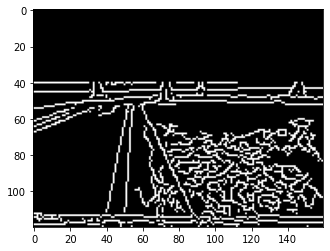

In [14]:
plt.imshow(preprocess_image(obs))

entering...
no change
no change
entering...
no change
no change
no change
no change
0.022892
1.229087
entering...
no change
no change
no change
no change
entering...
no change
no change
no change
no change
0.08659363
0.7249399


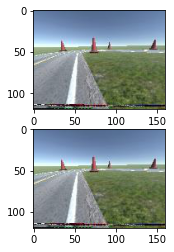

In [4]:
action = np.array([0, 0.1])  
f = plt.figure()
# execute the action
obs, reward, done, info = env.step(action)
print(info["cte"])
print(info["speed"])
f.add_subplot(2,1,1)
plt.imshow(obs)
time.sleep(0.5)
action = np.array([0.0, 0.0])  
# execute the action
obs, reward, done, info = env.step(action)
print(info["cte"])
print(info["speed"])
f.add_subplot(2,1,2)
plt.imshow(obs)

In [ ]:
import matplotlib.pyplot as plt

action = np.array([0, 1]) 
env.viewer.take_action(action)
observation, reward, done, info = env.viewer.observe()
print(info["cte"])
print(info["speed"])
plt.imshow(obs)

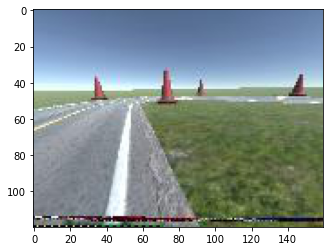

In [11]:
import matplotlib.pyplot as plt
plt.imshow(obs)

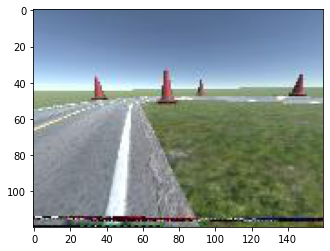

In [15]:
plt.imshow(env.viewer.handler.image_array)

In [12]:
print(obs.shape)

(120, 160, 3)


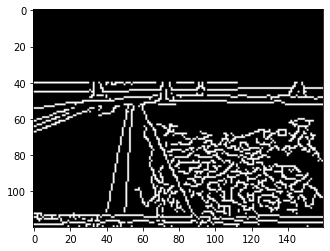

In [18]:
plt.imshow(preprocess_image(obs))

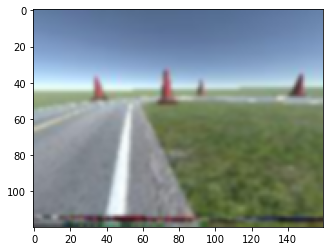

In [27]:
image = obs
kernel_size = 5
plt.imshow(cv2.GaussianBlur(image, (kernel_size, kernel_size), 0))

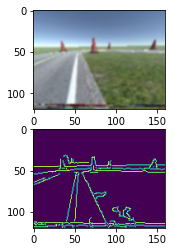

In [22]:
image = obs
kernel_size = 5
f = plt.figure()
blurred = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
f.add_subplot(2,1,1)
plt.imshow(blurred)
edges = detect_edges(blurred, low_threshold=50, high_threshold=150)
f.add_subplot(2,1,2)
plt.imshow(edges)

In [67]:
action = np.array([-1, 0.5])  
# execute the action
obs, reward, done, info = env.step(action)
print(info["cte"])
print(info["speed"])
print(reward, done)
time.sleep(0.5)
action = np.array([0.0, 0.0])  
# execute the action
obs, reward, done, info = env.step(action)
print(info["cte"])
print(info["speed"])
print(reward, done)

-17.30462
1.005604
-1.0 True
-17.83346
1.582679
-1.0 True


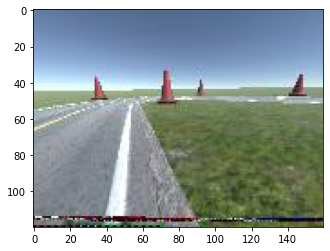

In [66]:
plt.imshow(obs)

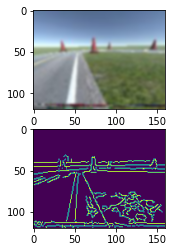

In [37]:
image = obs
kernel_size = 7
f = plt.figure()
blurred = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
f.add_subplot(2,1,1)
plt.imshow(blurred)
edges = detect_edges(blurred, low_threshold=80, high_threshold=20)
f.add_subplot(2,1,2)
plt.imshow(edges)

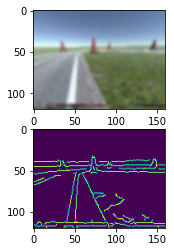

In [38]:
image = obs
kernel_size = 9
f = plt.figure()
blurred = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
f.add_subplot(2,1,1)
plt.imshow(blurred)
edges = detect_edges(blurred, low_threshold=80, high_threshold=20)
f.add_subplot(2,1,2)
plt.imshow(edges)

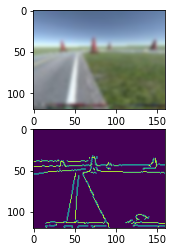

In [35]:
image = obs
kernel_size = 11
f = plt.figure()
blurred = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
f.add_subplot(2,1,1)
plt.imshow(blurred)
edges = detect_edges(blurred, low_threshold=80, high_threshold=20)
f.add_subplot(2,1,2)
plt.imshow(edges)

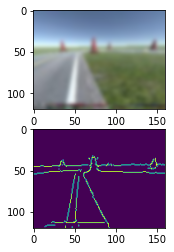

In [44]:
image = obs
kernel_size = 13
f = plt.figure()
blurred = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
f.add_subplot(2,1,1)
plt.imshow(blurred)
edges = detect_edges(blurred, low_threshold=80, high_threshold=20)
f.add_subplot(2,1,2)
plt.imshow(edges)

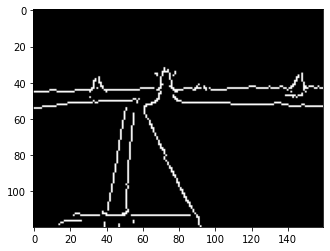

In [45]:
plt.imshow(cv2.merge((edges, edges, edges)))

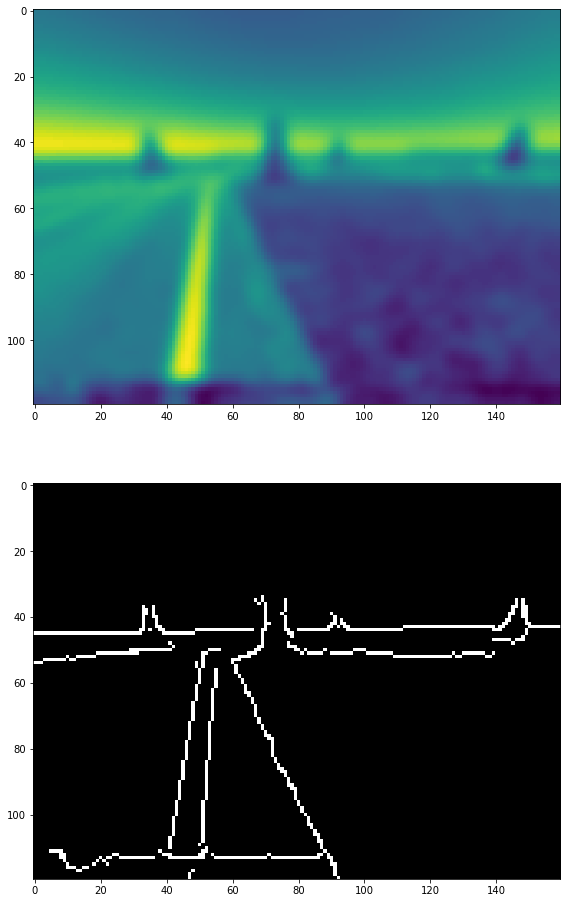

In [73]:
image = obs[:]
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
kernel_size = 13
f = plt.figure(figsize=(16,16))
blurred = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
f.add_subplot(2,1,1)
plt.imshow(blurred)
edges = detect_edges(blurred, low_threshold=80, high_threshold=20)
f.add_subplot(2,1,2)
plt.imshow(edges, cmap="gray")

(120, 160)


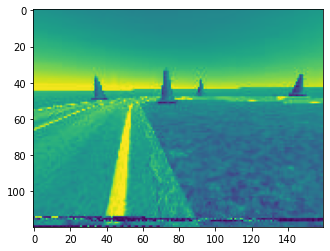

In [60]:
image = obs[:]
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)
print(image.shape)

(120, 160, 3)


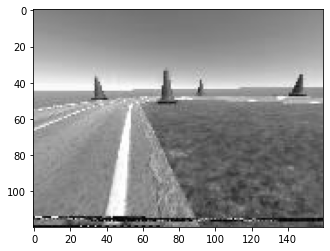

In [61]:
image = obs[:]
grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
grey = np.stack((grey, )*3, axis=-1)
plt.imshow(grey)
print(grey.shape)

In [ ]:
def process_image(obs):
        obs = self.rgb2gray(obs)
        obs = cv2.resize(obs, (img_rows, img_cols))
        return obs
plt.imshow(process_image(obs)

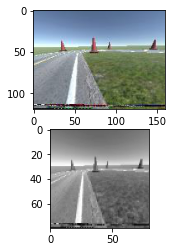

In [69]:
img_rows, img_cols = 80, 80
def rgb2gray(rgb):
    """
    take a numpy rgb image return a new single channel image converted to greyscale
    """
    return np.dot(rgb[..., :3], [0.299, 0.587, 0.114])

def process_image(obs):
    obs = rgb2gray(obs)
    obs = cv2.resize(obs, (img_rows, img_cols))
    return obs

processed = process_image(obs)
f = plt.figure()
f.add_subplot(2,1,1)
plt.imshow(obs)
f.add_subplot(2,1,2)
plt.imshow(processed, cmap="gray")

In [68]:
print(processed.shape)

(80, 80)


In [7]:
env.close()

## Test with images in the folder first

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
from PIL import Image

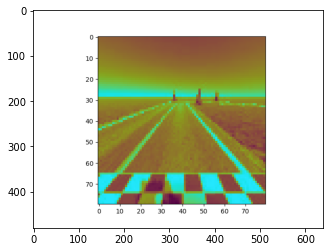

In [12]:
im = cv2.imread("0.png")
plt.imshow(im)

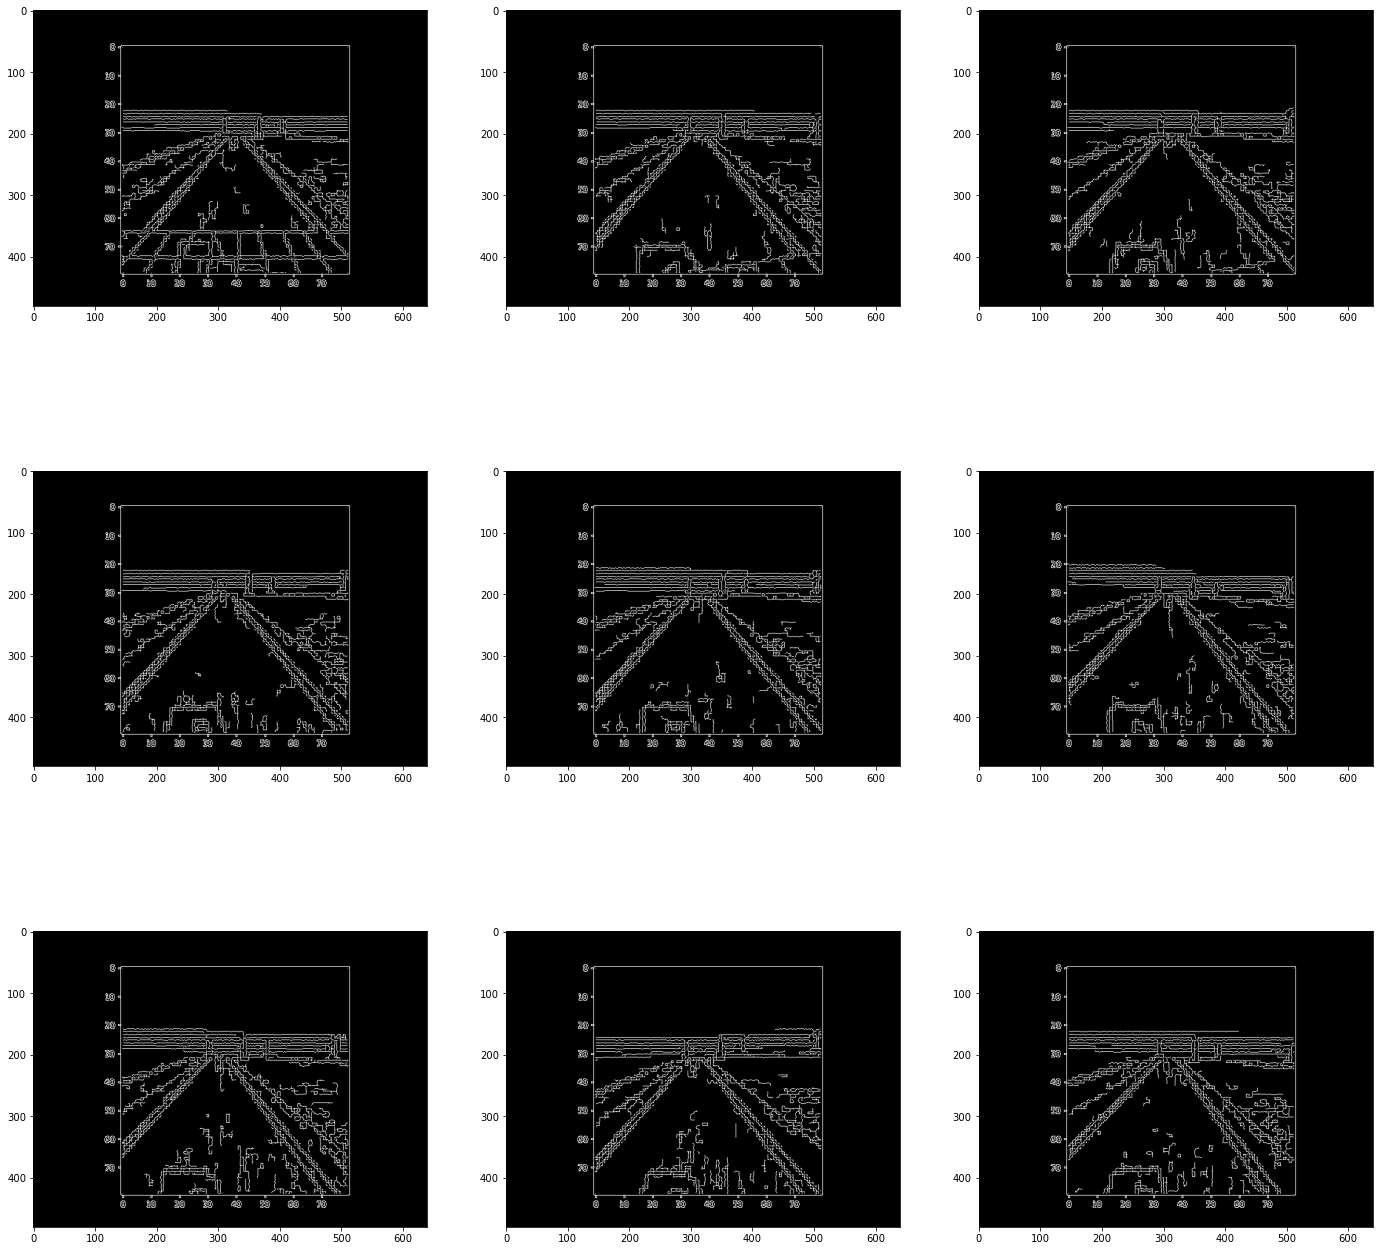

In [32]:
low_threshold = 20
high_threshold = 80 
kernel_size = 3
f = plt.figure(figsize=(24,24))
for i in range(9):
    im = cv2.imread("{}.png".format(i))
    im_blurred = cv2.GaussianBlur(im, (kernel_size, kernel_size), 0)
    im_edge = cv2.Canny(im_blurred, low_threshold, high_threshold)
    f.add_subplot(3,3,i+1)
    plt.imshow(im_edge, cmap="gray")

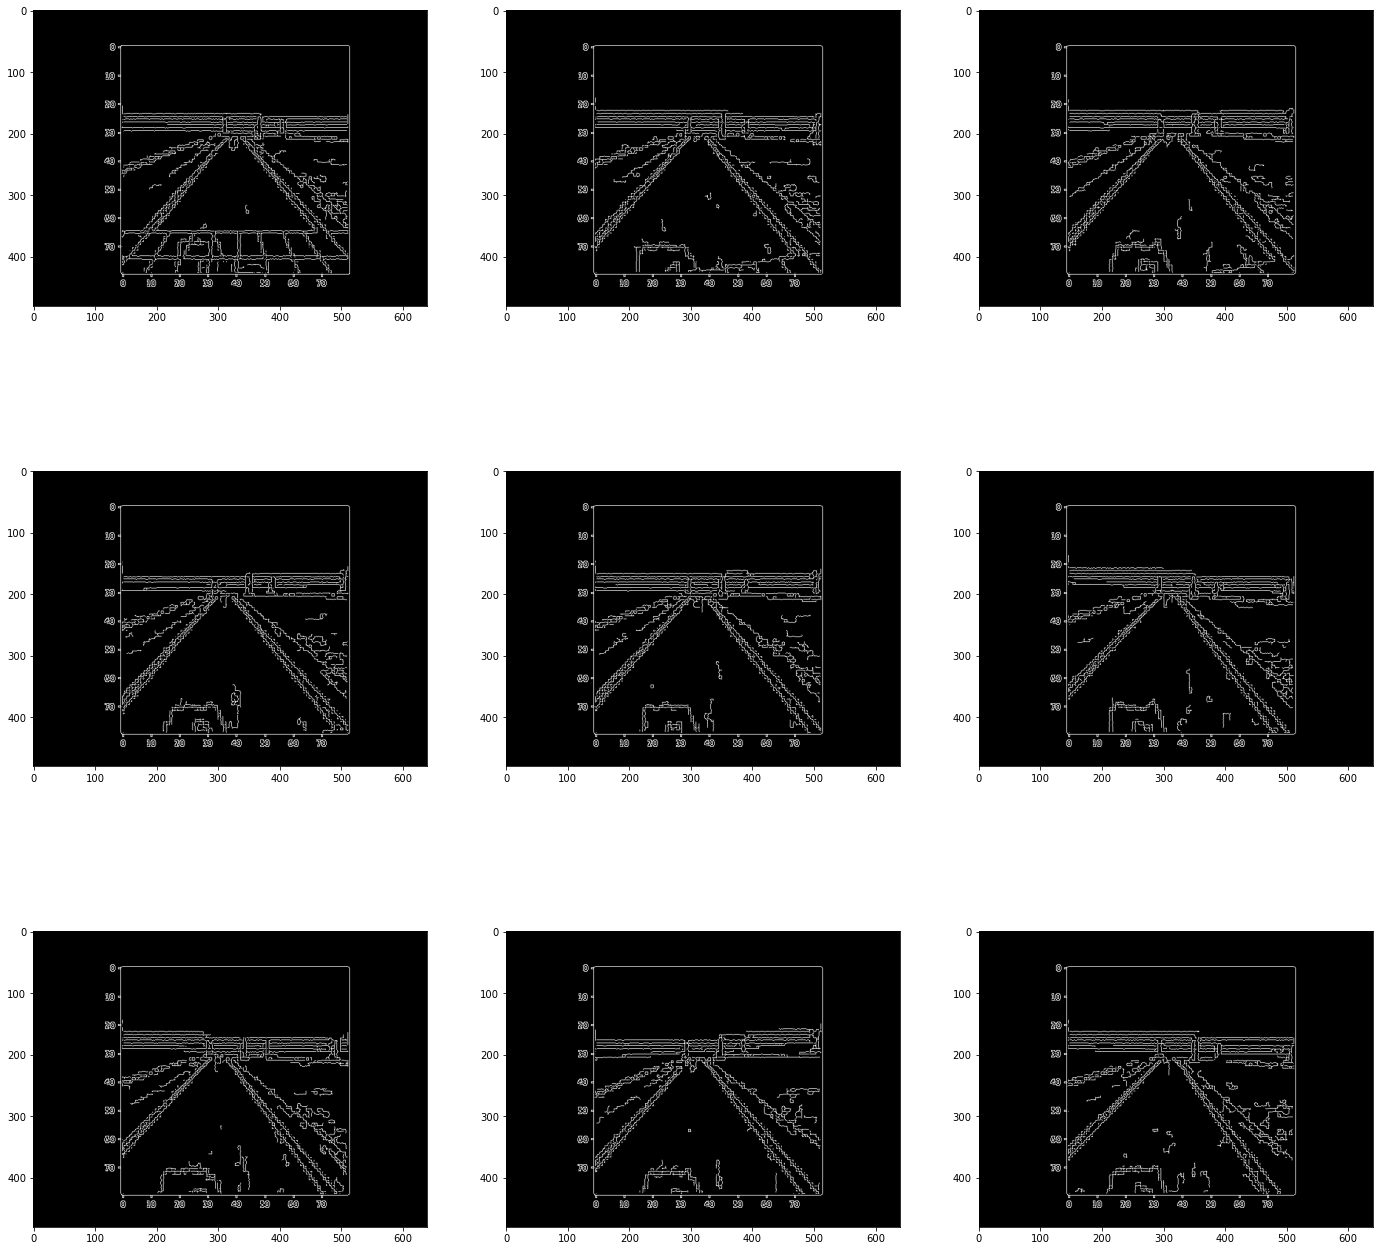

In [30]:
low_threshold = 20
high_threshold = 80 
kernel_size = 5
f = plt.figure(figsize=(24,24))
for i in range(9):
    im = cv2.imread("{}.png".format(i))
    im_blurred = cv2.GaussianBlur(im, (kernel_size, kernel_size), 0)
    im_edge = cv2.Canny(im_blurred, low_threshold, high_threshold)
    f.add_subplot(3,3,i+1)
    plt.imshow(im_edge, cmap="gray")

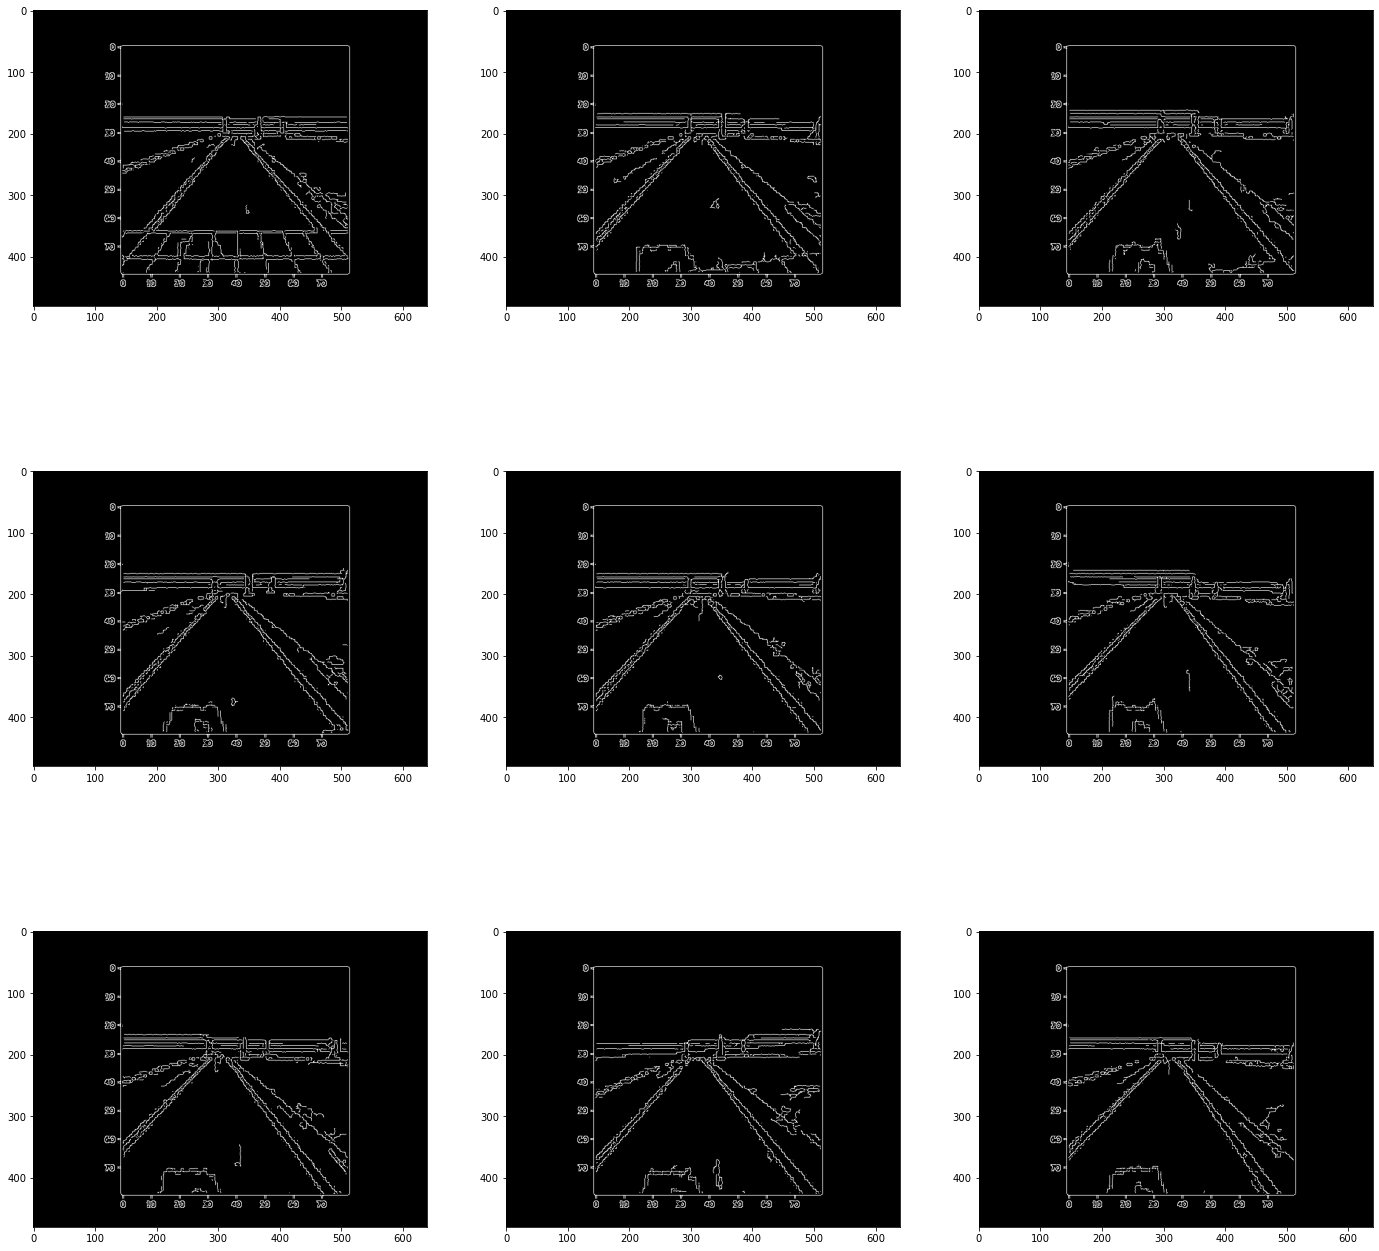

In [27]:
low_threshold = 20
high_threshold = 80 
kernel_size = 7
f = plt.figure(figsize=(24,24))
for i in range(9):
    im = cv2.imread("{}.png".format(i))
    im_blurred = cv2.GaussianBlur(im, (kernel_size, kernel_size), 0)
    im_edge = cv2.Canny(im_blurred, low_threshold, high_threshold)
    f.add_subplot(3,3,i+1)
    plt.imshow(im_edge, cmap="gray")

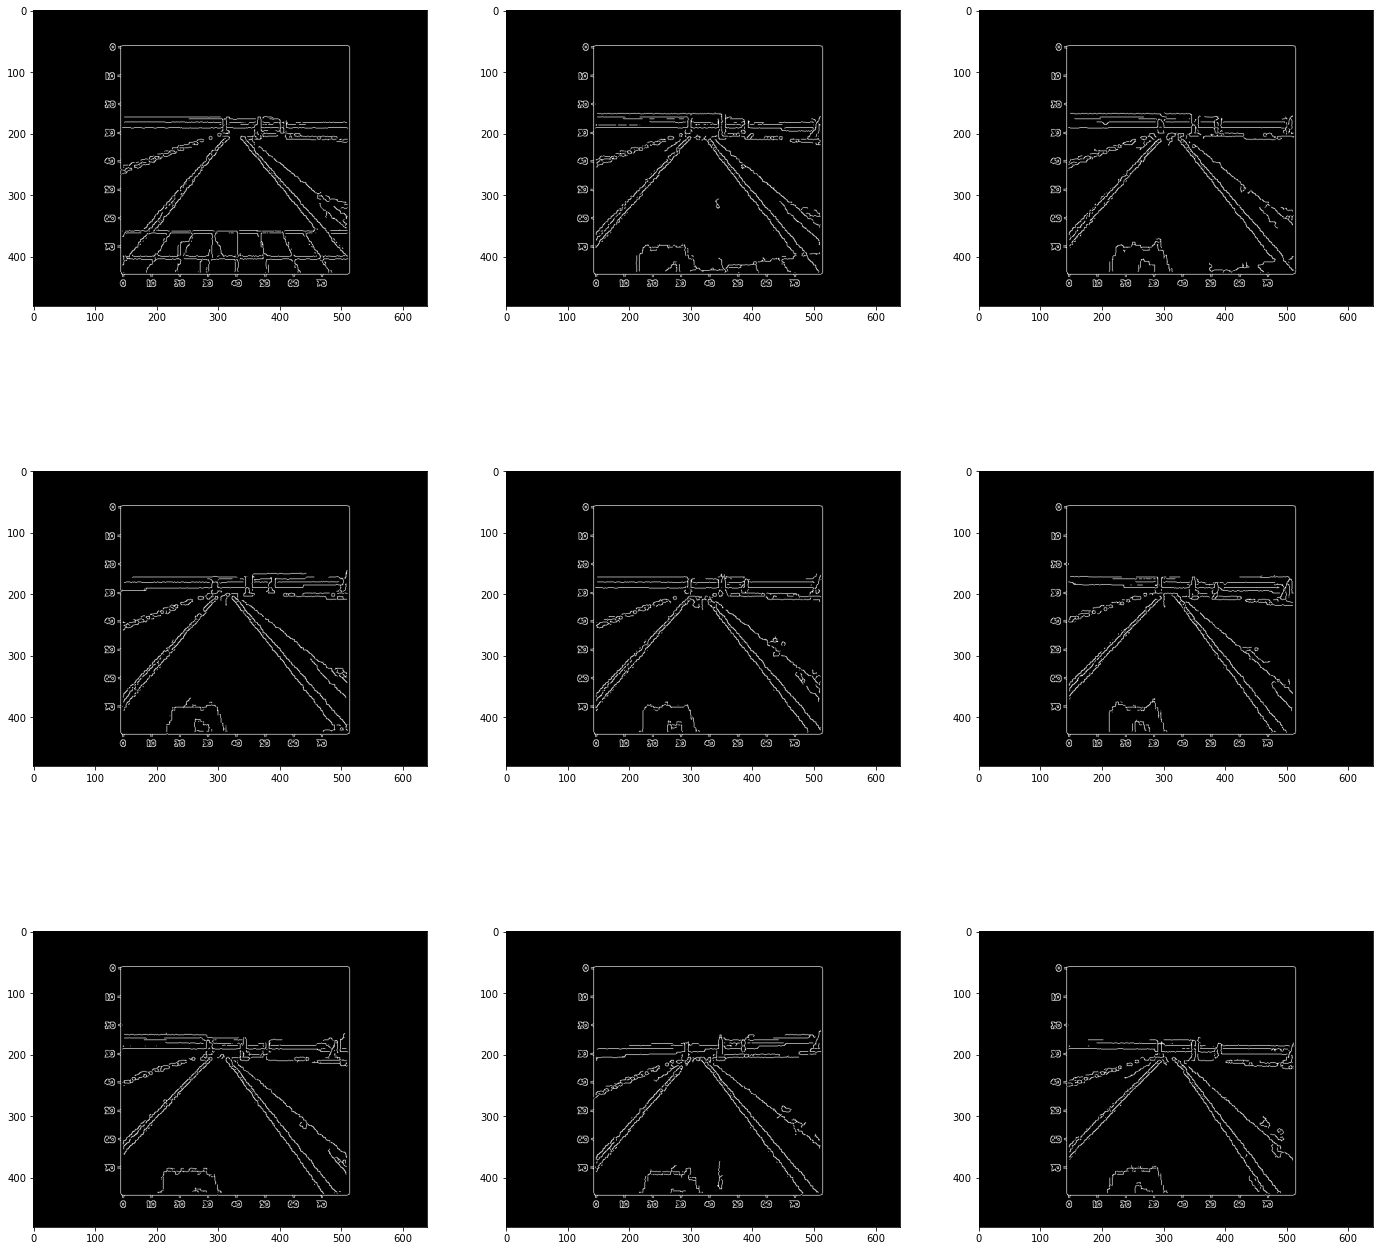

In [28]:
low_threshold = 20
high_threshold = 80 
kernel_size = 9
f = plt.figure(figsize=(24,24))
for i in range(9):
    im = cv2.imread("{}.png".format(i))
    im_blurred = cv2.GaussianBlur(im, (kernel_size, kernel_size), 0)
    im_edge = cv2.Canny(im_blurred, low_threshold, high_threshold)
    f.add_subplot(3,3,i+1)
    plt.imshow(im_edge, cmap="gray")

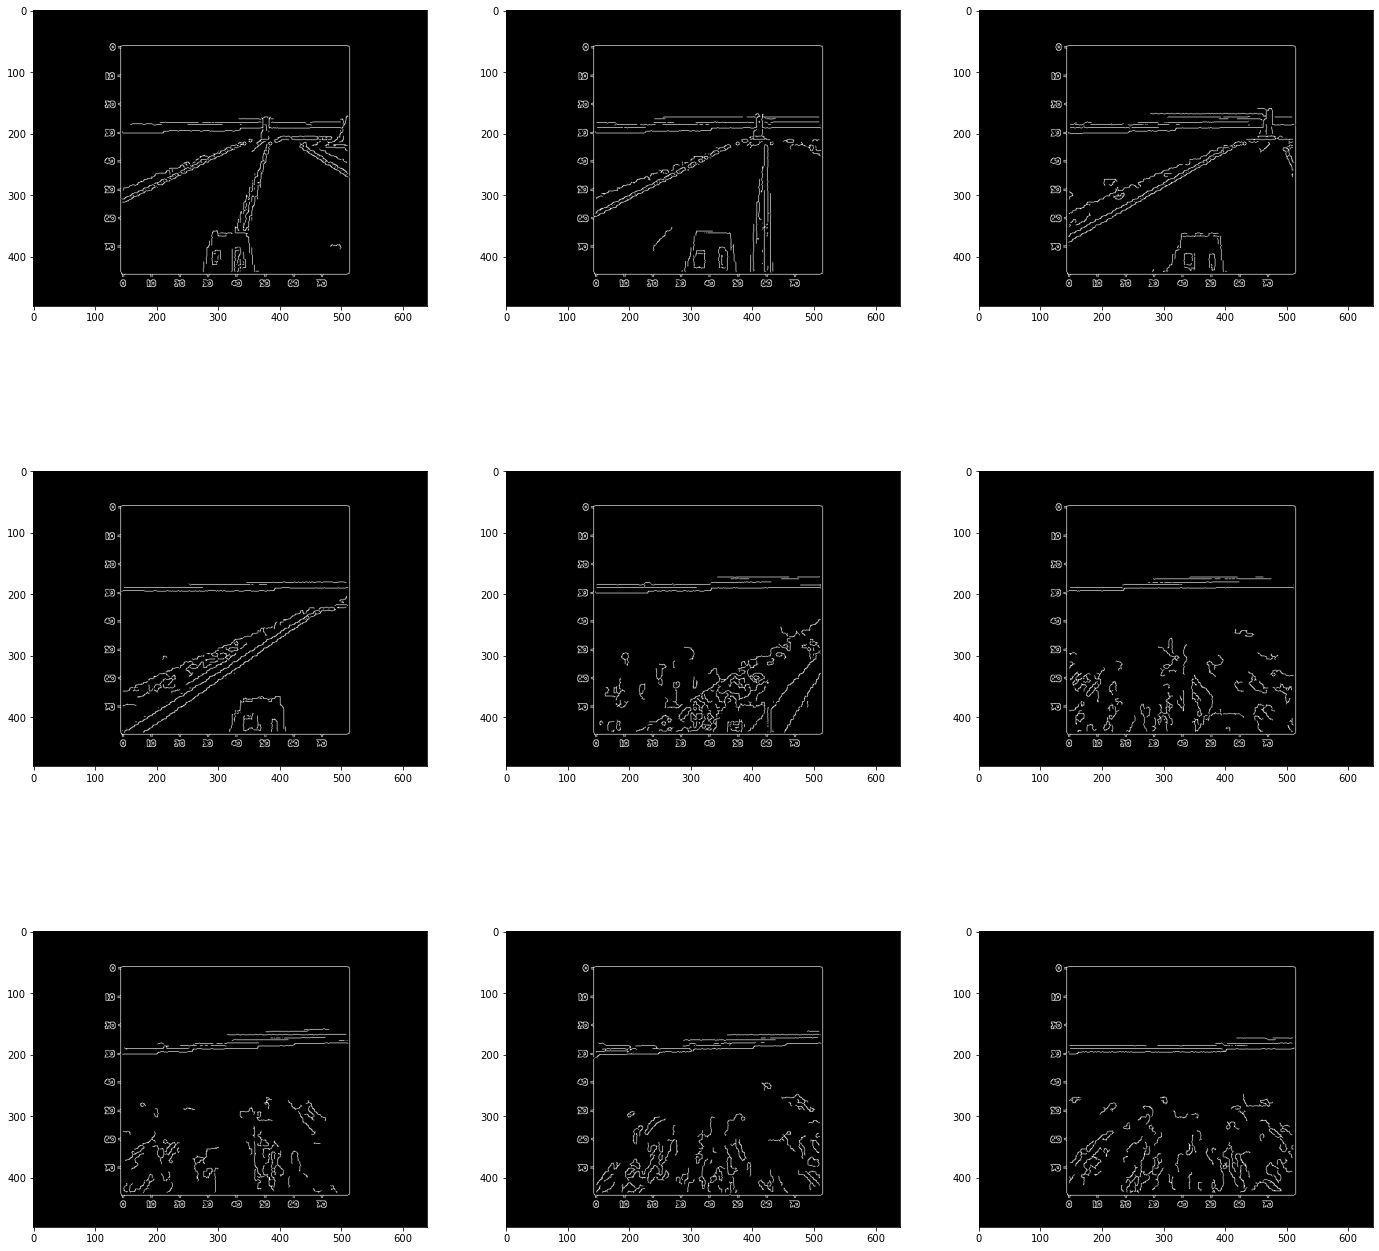

In [33]:
low_threshold = 20
high_threshold = 80 
kernel_size = 9
f = plt.figure(figsize=(24,24))
for i in range(9):
    im = cv2.imread("{}.png".format(i+20))
    im_blurred = cv2.GaussianBlur(im, (kernel_size, kernel_size), 0)
    im_edge = cv2.Canny(im_blurred, low_threshold, high_threshold)
    f.add_subplot(3,3,i+1)
    plt.imshow(im_edge, cmap="gray")

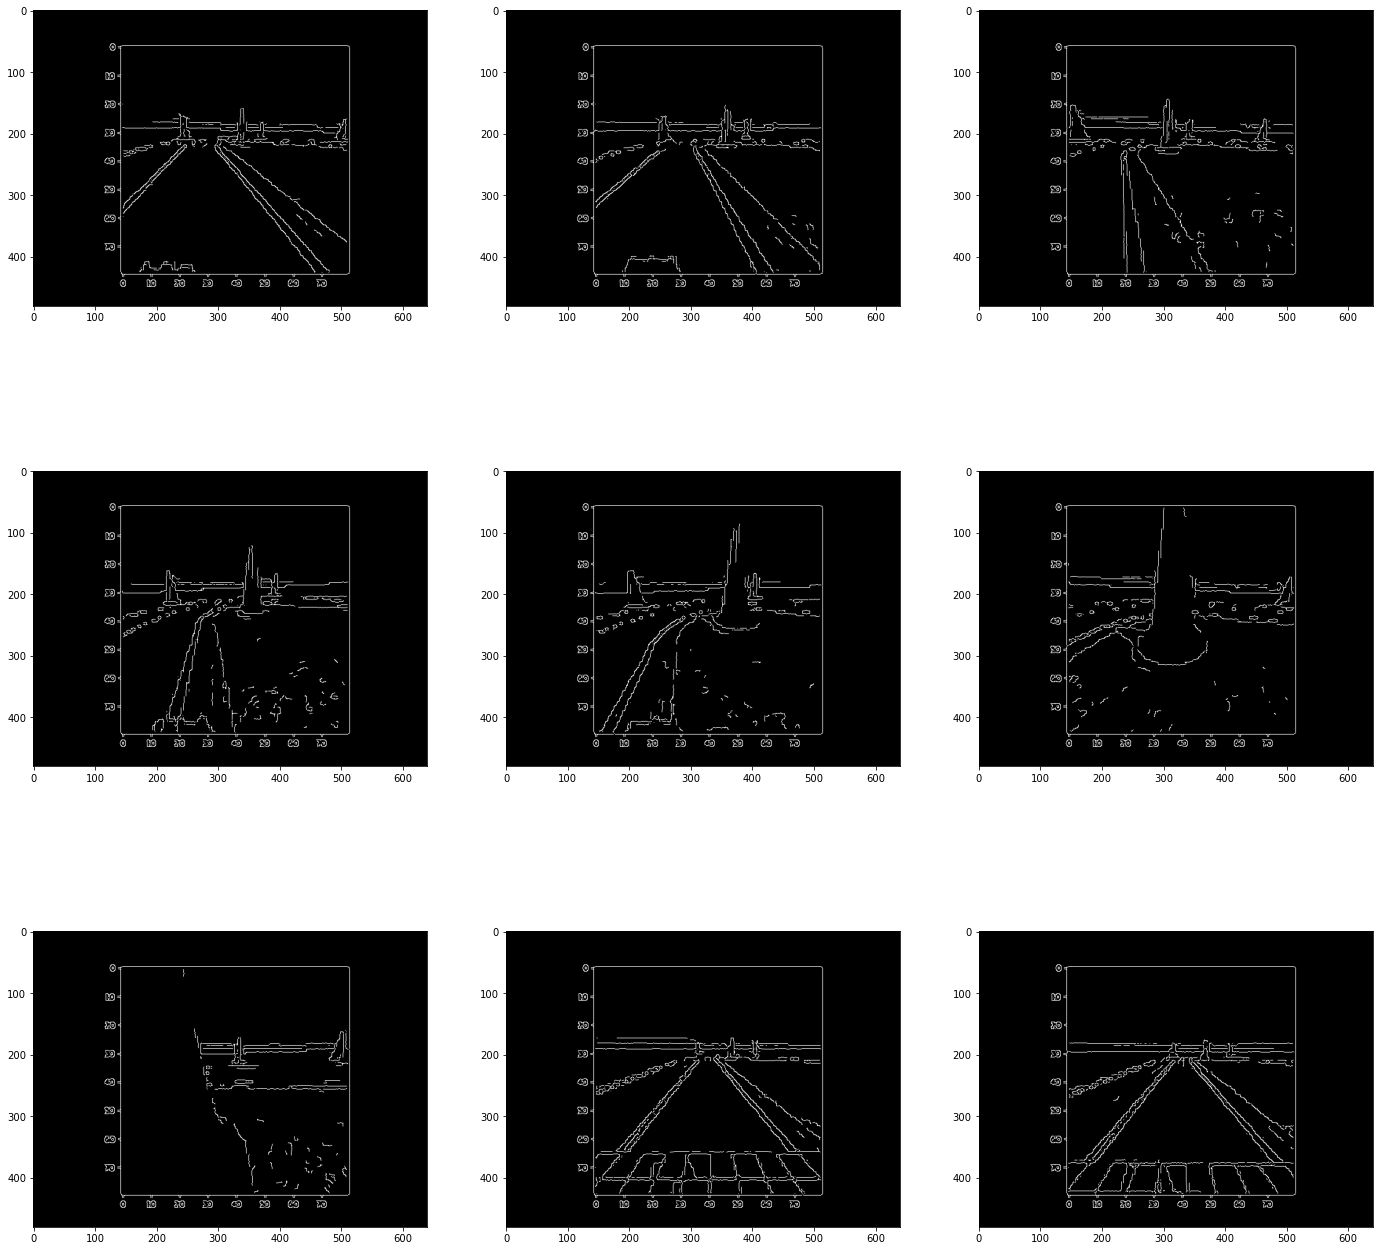

In [49]:
low_threshold = 60
high_threshold = 80 
kernel_size = 9
f = plt.figure(figsize=(24,24))
for i in range(9):
    im = cv2.imread("{}.png".format(i+40))
    im_blurred = cv2.GaussianBlur(im, (kernel_size, kernel_size), 0)
    im_edge = cv2.Canny(im_blurred, low_threshold, high_threshold)
    f.add_subplot(3,3,i+1)
    plt.imshow(im_edge, cmap="gray")

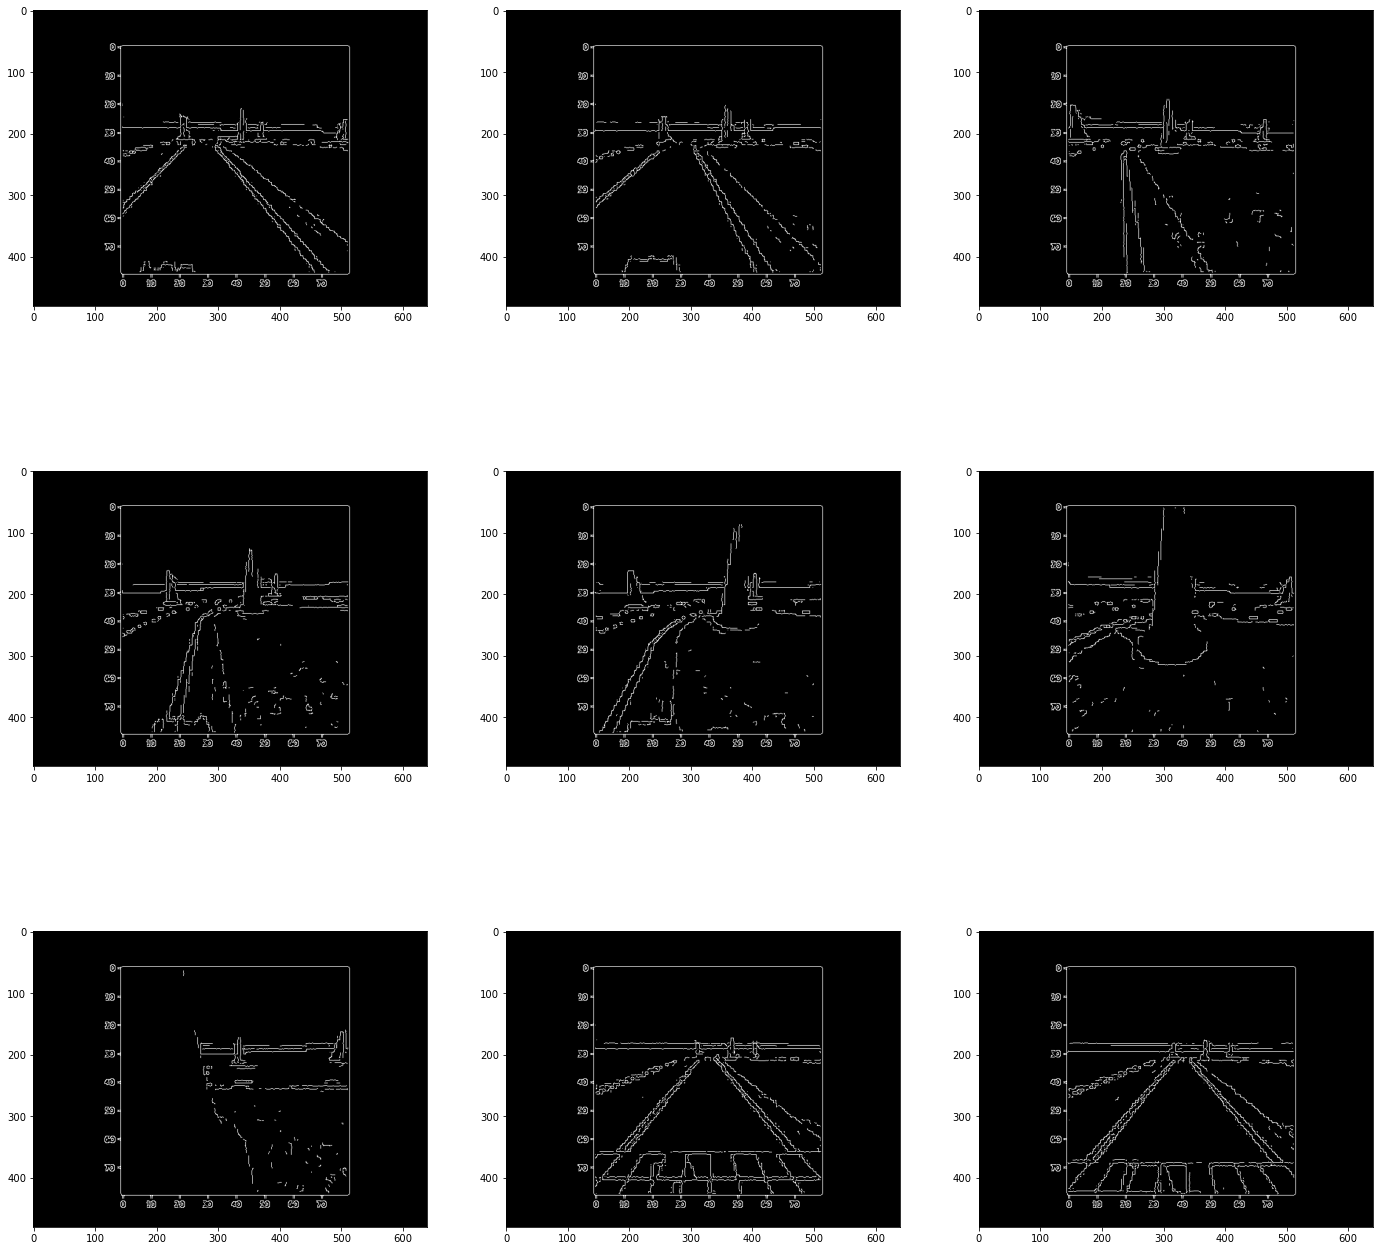

In [48]:
low_threshold = 80
high_threshold = 90 
kernel_size = 7
f = plt.figure(figsize=(24,24))
for i in range(9):
    im = cv2.imread("{}.png".format(i+40))
    im_blurred = cv2.GaussianBlur(im, (kernel_size, kernel_size), 0)
    im_edge = cv2.Canny(im_blurred, low_threshold, high_threshold)
    f.add_subplot(3,3,i+1)
    plt.imshow(im_edge, cmap="gray")

In [50]:
im_edge.shape

(480, 640)

In [51]:
im.shape

(480, 640, 3)

# Test the input shape for LSTM

In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
from PIL import Image

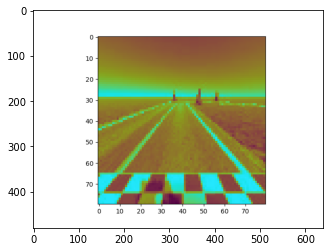

In [19]:
next_obs = cv2.imread("0.png")
plt.imshow(next_obs)

In [25]:
img_rows = 80
img_cols = 80
def rgb2gray(rgb):
    """
    take a numpy rgb image return a new single channel image converted to greyscale
    """
    return np.dot(rgb[..., :3], [0.299, 0.587, 0.114])

def process_image(obs):
    global LANE_SEGMENTATION 
    obs = rgb2gray(obs)
    obs = cv2.resize(obs, (img_rows, img_cols))
#         print("in process_image") # debug 
#         plt.imshow(obs) # debug
#     if LANE_SEGMENTATION: obs = detect_edge(obs)
    return obs

In [31]:
x_t = process_image(next_obs)
s_t = np.stack((x_t, x_t, x_t, x_t), axis=0)
print("s_t1 shape:", s_t.shape)
# In Keras, need to reshape
s_t = s_t.reshape(1, s_t.shape[0], s_t.shape[1], s_t.shape[2])  # 1*80*80*4
print("x_t1 shape:", x_t.shape)
print("s_t1 shape:", s_t.shape)

s_t1 shape: (4, 80, 80)
x_t1 shape: (80, 80)
s_t1 shape: (1, 4, 80, 80)


In [34]:
next_obs = cv2.imread("1.png")
# plt.imshow(agent.process_image(next_obs)) # debug
# plt.savefig("{}.png".format(agent.t)) # debug
x_t1 = process_image(next_obs)
x_t1 = x_t1.reshape(1, 1, x_t1.shape[0], x_t1.shape[1])  # 1x1x80x80
s_t1 = np.append(x_t1, s_t[:, :3, :, :], axis=1)  # 1x4x80x80
print("x_t1 shape:", x_t1.shape)
print("s_t1 shape:", s_t1.shape)

x_t1 shape: (1, 1, 80, 80)
s_t1 shape: (1, 4, 80, 80)
